In [6]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

### Poisson (Discrete)

##### Density (Probability Mass Function)

In [175]:
.5^0*exp(-.5)/factorial(0) 
# Poisson is discrete so P(x) is a formula PMF,
# not an integral PDF like a normal distribution.
# Poisson is an extreme version of binomial
# becomes normal as rate increases

[1] 0.6065307

In [176]:
dpois( x= 0, lambda = .5, log = F) # dpois gives the (log) density
# x is quantile for poisson its number of times event happens in time or space.
# (Number of flowers in garden, Number of calls in a day). This is dicrete and
# so for something that happens 1 every 2 days (.5),
# there is a probability of 0.0758 (7.58%) of this event this event occurs twice in 2 days.
# the density gives the probabilit here because poisson is a discrete distribution. PMF.

[1] 0.6065307

##### Cumulative Distribution Function

In [177]:
ppois( q=3, lambda=.5,  log.p = F, lower.tail = T) 
# ppois gives the (log) distribution function
# in this case I think it's the SUM of the density. 
# But for continous variables or
# PDFs life pnorm, CDF would be the integral of the density function(PDF).

[1] 0.9982484

In [178]:
dpois( x= 0, lambda = .5, log = F) +
dpois( x= 1, lambda = .5, log = F) + 
dpois( x= 2, lambda = .5, log = F) +
dpois( x= 3, lambda = .5, log = F)

[1] 0.9982484

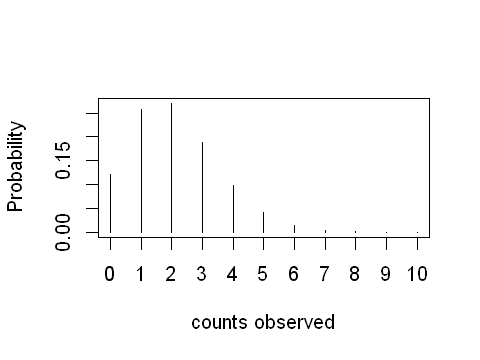

In [186]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
n=2.1
last_x = 10

for(i in 0:last_x) {
    # R doesn't let you start a vector at 0 so dpois(0) get skiped if
    j[i+1] = dpois(x= i, lambda = n, log = F) 
}
plot(y=j,x=seq(0,last_x,1),
     type="h", ylab='Probability', xlab='counts observed')
axis(side = 1, at=0:last_x)

### Binomial (Discrete)

##### Density (Probability Mass Function)

In [13]:
choose(n = 9,k = 7)*(0.5)^7*(1-0.5)^(9-7) 
#Binomial is discrete so P(x) is a formula PMF,
# not an integral PDF like a normal distribution.
# probability of getting 7 heads out of 9 flips
# As trials increases binomial becomes normal.
# Sum of Bernoulli becomes Binomial.

[1] 0.0703125

In [14]:
### Binomial distribution
dbinom(x = 7, size = 9 , prob = 0.5, log = FALSE) # dbinom gives the density.
#nCx*p^x*(1-p)^(n-x)

[1] 0.0703125

##### Cumulative Distribution Function

In [15]:
pbinom( q=2, size=8, prob=.5, log.p = F, lower.tail = T) # ppois gives the distribution function
# in this case I think it's the SUM of the density. But for continous variables or
# PDFs pnorm would be the integral of the density function(PDF).

[1] 0.1445313

In [16]:
dbinom( x = 0, size = 8 , prob = 0.5, log = FALSE) +
dbinom( x = 1, size = 8 , prob = 0.5, log = FALSE) + 
dbinom( x = 2, size = 8 , prob = 0.5, log = FALSE)

[1] 0.1445313

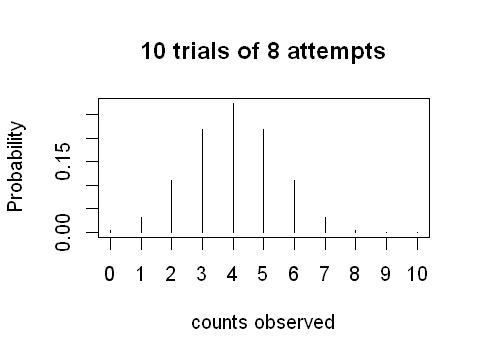

In [187]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
n=.5
last_x = 10 # 10 trials of 8 trials each.
m=8
for(i in 0:last_x) {
    j[i+1] = dbinom(i,size=m, prob=n)
}
plot(y=j,x=seq(0,last_x,1), type="h", ylab='Probability',
     xlab='counts observed',
     main ='10 trials of 8 attempts')
axis(side = 1, at=0:last_x)

### Normal (Continous)

##### Density (Probability Density Formula)

In [18]:
mu = 0
sd = 1
x = 3.09# observation or measurement
(1/sqrt(2*pi*sd^2))*exp(-(((x-mu)^2)/(2*sd^2)))
#normal is continous so this is a PDF,
# not a PMF like a binomial distribution and not a p(x).

[1] 0.003369508

In [19]:
### Normal distribution
dnorm(x = 3.09, mean = 0 , sd = 1, log = FALSE) # dnorm gives the density.
#(1/sqrt(2*pi*sd))*e(-(x-mu)^2/(2*sd^2))

[1] 0.003369508

##### Cumulative Distribution Function

In [20]:
pnorm( q=1.09, mean=4.7, sd=1.5, log.p = F, lower.tail = T) 
# pnorm gives 
# the distribution function
# PDFs pnorm gives the integral of the density function(PDF). NOT Sum like PMF binom,piosson

[1] 0.008049428

In [23]:
exp_pdf <- function(x,mu,sd) {
(1/sqrt(2*pi*sd^2))*exp(-(((x-mu)^2)/(2*sd^2)))
}
cdf<-integrate(exp_pdf, lower = -Inf, upper = 1.09, mu=4.7, sd=1.5 )
cdf$value

[1] 0.008049428

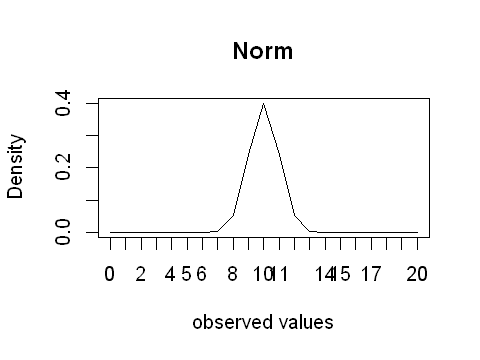

In [33]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = 20
for(i in 0:last_x) {
    j[i+1] = dnorm(x = i-10, mean = 0 , sd = 1, log = FALSE)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Norm')
axis(side = 1, at=0:last_x)

### Exponential (Continous)

##### Density (Probability Density Formula)

In [133]:
rate = .8
x = 5
rate*exp(-rate*x)
# Time between events.
# specifically events that occur at a poisson distribution

[1] 0.01465251

In [140]:
dexp(x=5, rate = 0.8, log = FALSE)

[1] 0.01465251

##### Cumulative Distribution Function

In [135]:
pexp(q= 3, rate = .5 , lower.tail = F, log.p = FALSE)
# What is the probability that the bouncer
# has to wait MORE THAN 3 minutes to card the next student?
# Students arrive in Poisson process at
# a mean rate of 30 students per hour.
# rate = 30 students / 1 hour = 0.5
# P(x>3) = 0.223 more than 3 minutes

[1] 0.2231302

In [136]:
exp_pdf <- function(x) {.5*exp(-.5*x)}
c<-integrate(exp_pdf, lower = 0, upper = 3)
1-c$value

[1] 0.2231302

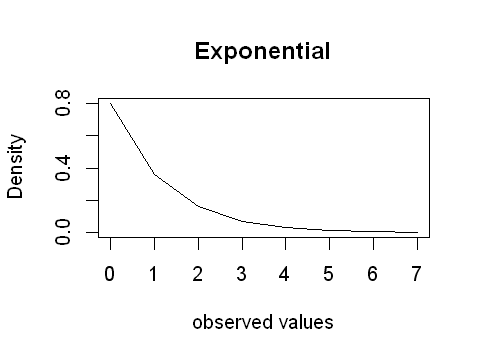

In [138]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 2
for(i in 0:last_x) {
    j[i+1] = dexp(x=i, rate = 0.8, log = FALSE)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Exponential')
axis(side = 1, at=0:last_x)

### Uniform (Continous & Discrete)

##### Density (Probability Density Formula)

In [41]:
# Uniform can be discrete like dice rolls. Also,
# Uniform can be continous like when assigning patients
# to experiment control group.
# -- for example if we want to split 20 ppl in 2 groups randomnly, then
# -- generate runif(20 numbers), sort then first 10 is one 
# -- group and rest the other.DONE!

In [42]:
# Continuous uniform distribution
# PDF
max = 6
min = 1
1/(max - min) 

[1] 0.2

In [43]:
dunif(x=3, min=1, max=6, log=FALSE)

[1] 0.2

##### Cumulative Distribution Function PDF

In [44]:
punif(q=4, min=1, max=6, lower.tail=T, log.p=F)

[1] 0.6

In [63]:
dunif(x=1, min=1, max=6, log=FALSE) +
dunif(x=2, min=1, max=6, log=FALSE) +
dunif(x=3, min=1, max=6, log=FALSE)
# Less than 4

[1] 0.6

##### (Discrete) Density PMF

In [67]:
min = 1
max = 6
ddu<-function(min,max) ifelse(min>=1 & min<=max & round(min)==min,1/max,0) 
ddu(min,max)

[1] 0.1666667

In [65]:
ddu(1,6) +
ddu(2,6) +
ddu(3,6) +
ddu(4,6)

[1] 0.6666667

##### Cumulative Distribution Function PMF

In [66]:
pdu<-function(x,min,max) ifelse(x<min,0,
                                ifelse(x<=max,(x-min+1)/(max-min+1),1))
pdu(4,3,6)

[1] 0.5

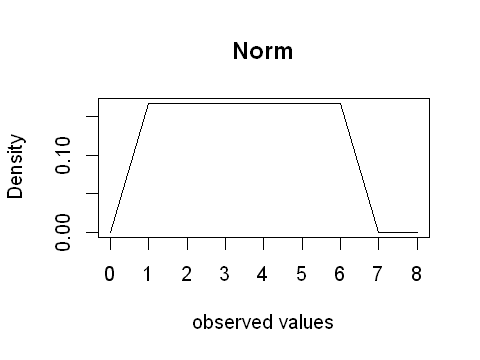

In [68]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = max+2
for(i in 0:last_x) {
    j[i+1] = ddu(i,max)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Norm')
axis(side = 1, at=0:last_x)

### Bernoulli (Discrete)

##### Density (Probability Mass Function)

In [70]:
x = 1
p = 0.6
(p)**x*(1-p)**(1-x)

[1] 0.6

In [71]:
# Bernoulli is a discrete distribution like
# binomial but only has 1 trial. x can only be 1 or 0
dbinom(x=x,size=1, prob=p, log=FALSE)

[1] 0.6

##### Cumulative Distribution Function

In [ ]:
# Since x can only be 1 or 0 CDF is 0 or 1 or 1-p. 
# 0 if x<0
# 1 if x>1
# 1-p if x <=0 and < 1.

### Hypergeometric (Discrete)

##### Density (Probability Mass Function)

In [85]:
# Similar to Binomial (with replacement)
# Hypergeometric (without replacement) 
# As Hypergeo grows gets similar to Binom then normal.
# p(x)=choose(m, x)*choose(pop-tot_s, k-x)/choose(pop, k)
T_pop = 12 # Total population (successes included)
T_s = 7 # Total number Successes states in pop.
N_d = 5 # Number of Draws (some succ some not)
O_s = 4 # Number of observed Successes
# P(O_s) Probability of O_s.... 
# ... ways_to_succ * ways_not_to_succ / total ways 
(
choose(n = T_s,k = O_s)*
choose(n = (T_pop-T_s),k = (N_d-O_s)) / choose(n = T_pop,k = N_d)
)

[1] 0.2209596

In [73]:
dhyper(x = O_s, m = T_s, n = (T_pop-T_s),k = N_d, log = F)

[1] 0.2209596

In [74]:
dbinom(x = O_s, size = N_d, prob = O_s/T_s, log = F)

[1] 0.2284762

##### Cumulative Distribution Function

In [75]:
# Probability drawing less than 4
phyper(q = O_s,m = T_s,n = (T_pop-T_s),k = N_d,lower.tail = T, log.p = F)

[1] 0.9734848

In [76]:
dhyper(x = 0, m = T_s, n = (T_pop-T_s),k = N_d,log = F)+
dhyper(x = 1, m = T_s, n = (T_pop-T_s),k = N_d,log = F)+
dhyper(x = 2, m = T_s, n = (T_pop-T_s),k = N_d,log = F)+
dhyper(x = 3, m = T_s, n = (T_pop-T_s),k = N_d,log = F)+
dhyper(x = O_s, m = T_s, n = (T_pop-T_s),k = N_d,log = F)

[1] 0.9734848

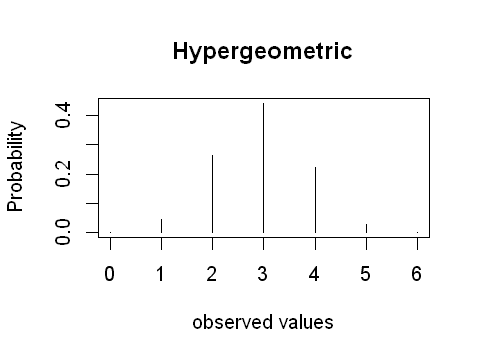

In [172]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = O_s+2
for(i in 0:last_x) {
    j[i+1] = dhyper(x = i, m = T_s, n = (T_pop-T_s),k = N_d,log = F)
}
plot(y=j,x=seq(0,last_x,1), type="h", ylab='Probability',
     xlab='observed values',
     main ='Hypergeometric')
axis(side = 1, at=0:last_x)

### Chi-Squared (Continous)

##### Density (Probability Density Function)

In [86]:
# The simplest chi-squared distribution is
# the square of a standard normal distribution.
#chi
x=4
k= 7
(x**((k/2)-1)*exp(-x/2))/(2**(k/2)*(factorial((k/2)-1)))

[1] 0.1151807

In [130]:
dchisq(x = x,df = k,ncp = 0,log = F)

[1] 0.07322491

##### Cumulative Distribution Function

In [88]:
chisq_pdf <- function(x,k) {
    (x**((k/2)-1)*exp(-x/2))/(2**(k/2)*(factorial((k/2)-1)))
}
c<-integrate(chisq_pdf, lower = 0, upper = 4, k=7)
c$value

[1] 0.2202226

In [89]:
pchisq(q = 4, df = 7, ncp = 0, lower.tail = T, log.p = F)

[1] 0.2202226

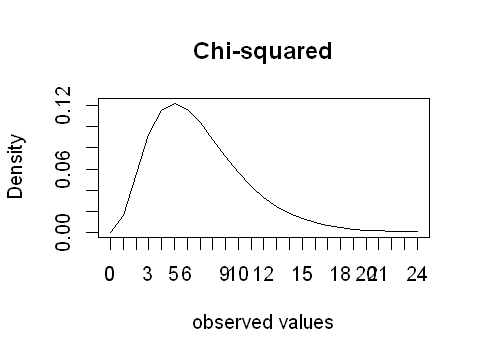

In [94]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = O_s+20
for(i in 0:last_x) {
    j[i+1] = dchisq(x = i,df = k,ncp = 0,log = F)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Chi-squared')
axis(side = 1, at=0:last_x)

### Geometric (Discrete)

##### Density (Probability Mass Function)

In [95]:
# Theres a shifted and not shifted versions of the Geometric Distribution.
# Shifted. How many trials till a success? (1 success)
# Unshifted. How many failures until a success? (1 success)

# Shifted Geometric. 
# Probability that first occurrence of success
# requires x independent trials.
# p(x) = p*(1-p)^(x-1)
.6*(1-.6)^(3-1) # <-- 1 succ in 3 trials.
# This diff from binomial 1 succ out of 3 trials 
# because geometric distribution is order specific and binom is not.

# Unshifted Geometric (similar to bernoulli)
# Probability that first success
# requires x number of failures.
# p(x) = p*(1-p)^x
.6*(1-.6)^3 # <-- 1 succ after 3 failures

[1] 0.096

[1] 0.0384

In [151]:
dgeom(x=3, prob=0.6, log =F)

[1] 0.0384

##### Cumulative Distribution Function

In [97]:
dgeom(x=0,prob=0.6,log =F)+
dgeom(x=1,prob=0.6,log =F)+
dgeom(x=2,prob=0.6,log =F)+
dgeom(x=3,prob=0.6,log =F)

[1] 0.9744

In [98]:
pgeom(q = 3, prob = 0.6, lower.tail = T, log.p = F)

[1] 0.9744

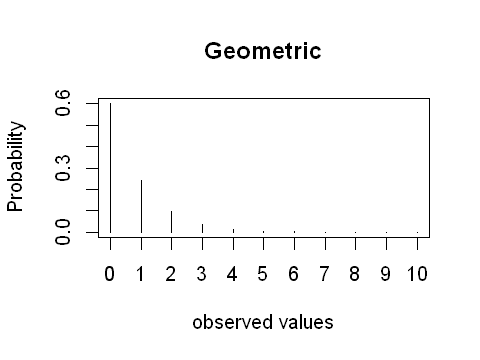

In [171]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = 10
for(i in 0:last_x) {
    j[i+1] = dgeom(x=i,prob=0.6,log =F)
}
plot(y=j,x=seq(0,last_x,1), type="h", ylab='Probability',
     xlab='observed values',
     main ='Geometric')
axis(side = 1, at=0:last_x)

### Negative Binomial (Discrete)

##### Density (Probability Mass Function)

In [104]:
# It’s the number of failures (r)
# until k successes have occurred, not just 1.
# Or it's number of trials (r) until k successes.
# Similar to geometric 2 versions
r = 6 # failures
k = 3 # successes
p = 0.7 # p of success
# failures version
choose(n = (r + k - 1), k = k-1)*p^k*(1-p)^r
# failures version
factorial(r+k-1)/(factorial(k-1)*factorial(r))*p^k*(1-p)^r

[1] 0.007001316

[1] 0.007001316

In [128]:
dnbinom(x = r, size = k, prob = p, log = F)
# size = target for number of successful trials
# x can be number of trials or failures depends on your context.

[1] 0.007001316

##### Cumulative Distribution Function

In [106]:
dnbinom(x = 0, size = k, prob = p, log = F)+
dnbinom(x = 1, size = k, prob = p, log = F)+
dnbinom(x = 2, size = k, prob = p, log = F)+
dnbinom(x = 3, size = k, prob = p, log = F)+
dnbinom(x = 4, size = k, prob = p, log = F)

[1] 0.9712045

In [107]:
pnbinom(q=4,size=k,prob=p,lower.tail = T,log.p = F)

[1] 0.9712045

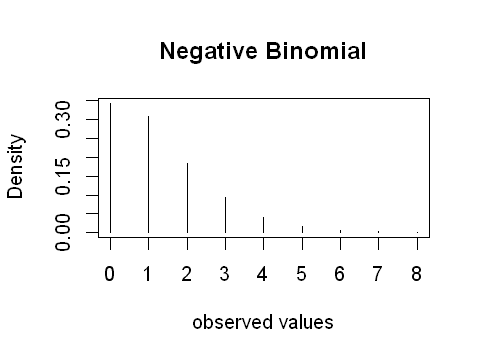

In [169]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = r + 2
for(i in 0:last_x) {
    j[i+1] = dnbinom(x = i, size = k, prob = p, log = F)
}
plot(y=j,x=seq(0,last_x,1), type="h", ylab='Density',
     xlab='observed values',
     main ='Negative Binomial')
axis(side = 1, at=0:last_x)

### Weibull (Continous)

##### Density (Probability Density Function)

In [157]:
# Probability of time to event (failure) has option
# of changes of rate over time.
# Similar to exponential where rate is assumed constant.
# Weibull can model increasing/decreasing rates.
# f(x;a,b)
x=5 # x>0 time to failure
a=0.6 # a>0 shape
b=1 # b>0 scale
(a/b)*(x/b)^(a-1)*exp(-(x/b)^a);
# a<1 means rate decreases over time.
# a=1 same as exponential distribution.
# a>1 means rate increase over time. Monotonically increasing.

[1] 0.02279695

In [189]:
dweibull(x = x, shape = a, scale = b, log = F) 
# if x = 0 --> Inf

[1] 0.06944957

##### Cumulative Distribution Function

In [159]:
pweibull(q = x,shape = a,scale = b,lower.tail = T,log.p = F)

[1] 0.9276708

In [160]:
weibull_pdf <- function(x,a,b) {
    (a/b)*(x/b)^(a-1)*exp(-(x/b)^a)
}
c<-integrate(weibull_pdf, lower = 0, upper = x, a=a ,b=b)
c$value

[1] 0.9276709

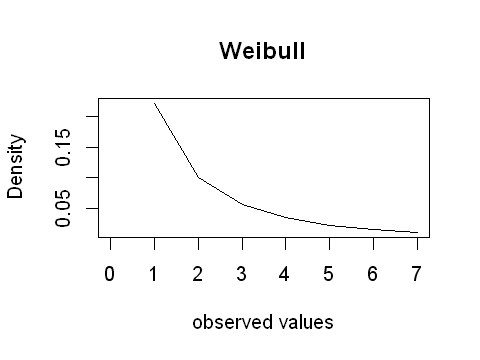

In [161]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 2
for(i in 0:last_x) {
    j[i+1] = dweibull(x = i, shape = a, scale = b, log = F)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Weibull')
axis(side = 1, at=0:last_x)

### Log-Normal (Continous)

##### Density (Probability Density Function)

In [190]:
# Looks similar to Weibull
# X>=0 always.
# Log-Normal is a distribution of a variable whose log is normal.
# If variable normal then exp(variable) is log-normal.
# Also known as Galton distribution
mu = 0
sig = 1
x = 2.6
(1/sqrt(2*pi))*1/sig*1/x*exp(-(1/2*sig^2)*(log(x)-mu)^2)

[1] 0.09720326

In [191]:
dlnorm(x = x,meanlog = 0,sdlog = 1,log = F)

[1] 0.09720326

##### Cumulative Distribution Function

In [192]:
lognormal_pdf <- function(x,mu,sig) {
    (1/sqrt(2*pi))*1/sig*1/x*exp(-(1/2*sig^2)*(log(x)-mu)^2)
}
c<-integrate(lognormal_pdf, lower = 0, upper = x, mu=mu ,sig=sig)
c$value

[1] 0.8303405

In [193]:
plnorm(q = x, meanlog = mu, sdlog = sig,lower.tail = T, log.p = F)

[1] 0.8303404

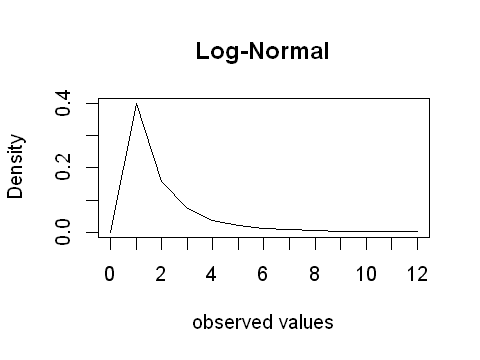

In [194]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 10
for(i in 0:last_x) {
    j[i+1] = dlnorm(x = i,meanlog = 0,sdlog = 1,log = F)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Log-Normal')
axis(side = 1, at=0:last_x)

### Gamma (Continous)

##### Density (Probability Density Function)

In [195]:
# Gamma is a generalization of both exponential and chi-squared distr.
# Why used? 
# Used as a sophisticated model of waiting times.
# Time until the next n events occur.
# Like Negative-binomal but continous. 
# Also like Exponential.
x=5
a=1 # scale (+)
b=2 # shape (+)
(x^(b-1)*(exp(-x/a)))/((a^b)*factorial(b-1))
# gamma function is factorial(x-1) == gamma(x).

[1] 0.03368973

In [196]:
dgamma(x = x,shape = b, scale = a, log = F)

[1] 0.03368973

##### Cumulative Distribution Function

In [197]:
gamma_pdf <- function(x,a,b) {
    (x^(b-1)*(exp(-x/a)))/((a^b)*factorial(b-1))
}
c<-integrate(gamma_pdf, lower = 0, upper = x, a=a ,b=b)
c$value

[1] 0.9595723

In [198]:
pgamma(q = x, scale = a, shape = b, lower.tail = T, log.p = F)

[1] 0.9595723

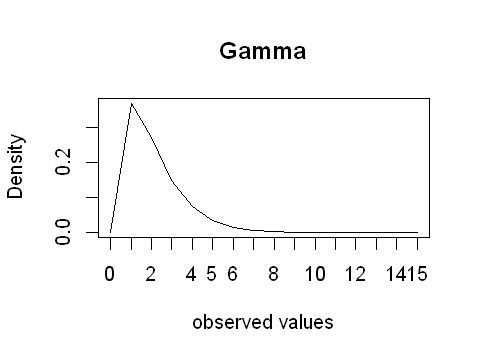

In [201]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 10
for(i in 0:last_x) {
    j[i+1] = dgamma(x = i,shape = b, scale = a, log = F)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Gamma')
axis(side = 1, at=0:last_x)

### Beta (Continous)

##### Density (Probability Density Function)

In [207]:
# Beta used to model percentages, interest rates, probabilities
# because x lies between 0 and 1.
x = 0.6 # must be between 0 and 1. 
b = 0.7 # shape >0. beta.
y = 2 # shape >0. gamma. yeah 2 shapes.
(factorial((b+y)-1)*x^(b-1)*(1-x)^(y-1))/(factorial(b-1)*factorial(y-1))

[1] 0.5548321

In [214]:
dbeta(x = x, shape1 = b, shape2 = y, log = F )

[1] 0.5548321

##### Cumulative Distribution Function

In [209]:
beta_pdf <- function(x,b,y) {
    (factorial((b+y)-1)*x^(b-1)*(1-x)^(y-1))/
    (factorial(b-1)*factorial(y-1))
}
cdf<-integrate(beta_pdf, lower = 0, upper = x, b=b, y=y)
cdf$value

[1] 0.8951913

In [210]:
pbeta(q = x, shape1 = b, shape2 = y, lower.tail = T, log.p = F)

[1] 0.8951913

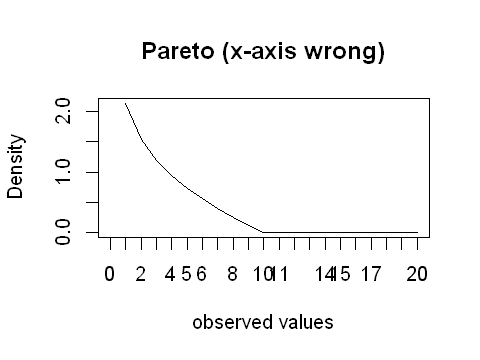

In [222]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 20
for(i in 0:last_x) {
    j[i+1] = dbeta(x = i/10, shape1 = b, shape2 = y, log = F )
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='Pareto (x-axis wrong)')
axis(side = 1, at=0:last_x)

### Pareto (Continous)

##### Density (Probability Density Function)

In [ ]:
# Model income distribution. Lifetime of object with 
# warrenty period since distribution
# doesnt have to start at 0.
x = 7 # x > lambda.
lambda = 4 # minimum value
k = 2 # shape. looks like shape
(k*(lambda^k))/(x^(k+1))

In [ ]:
library('EnvStats')
dpareto(x = x, location = lambda, shape = k)

##### Cumulative Distribution Function

In [ ]:
pareto_pdf <- function(x,lambda,k) {
    (k*(lambda^k))/(x^(k+1))
}
cdf<-integrate(pareto_pdf, lower = lambda, upper = x, lambda=lambda, k=k)
cdf$value

In [ ]:
ppareto(q = x, location = lambda, shape = k)

### Students (Continous)

##### Density (Probability Density Function)

In [ ]:
x = 1.3 # btw -inf and inf
n = 3 # degrees of freedom. integer (+).
factorial(((n+1)/2)-1)*(1+(x^2)/n)^(-(n+1)/2)/
(sqrt(n*pi)*factorial((n/2)-1))

In [ ]:
dt(x = x, df = n, log = F)

##### Cumulative Distribution Function

In [ ]:
t_pdf <- function(x,n) {
    factorial(((n+1)/2)-1)*(1+(x^2)/n)^(-(n+1)/2)/
(sqrt(n*pi)*factorial((n/2)-1))
}
cdf<-integrate(t_pdf, lower = -Inf , upper = x, n=n)
cdf$value

In [ ]:
pt(q = x, df = n, lower.tail = T, log.p = F)

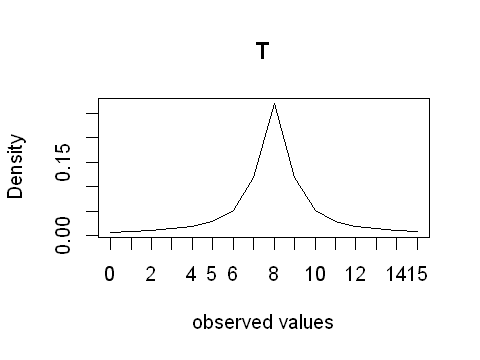

In [236]:
# R doesn't let you start a vector at 0 so dpois(0) get skiped if
# just do j[i]. thats why we did j[i+1]
j=vector()
last_x = x + 15
for(i in 0:last_x) {
    j[i+1] = dt(x = i-8, df = n, log = F)
}
plot(y=j,x=seq(0,last_x,1), type="l", ylab='Density',
     xlab='observed values',
     main ='T')
axis(side = 1, at=0:last_x)